In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.1


In [3]:
# both keras and tf datasets can be used. TFDS will be used to show the list of datasets.
# TFDS is a high-level wrapper around tf.data.
import tensorflow_datasets as tfds

In [4]:
# list of datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [5]:
# necessary libraries for data exploration and further data operations
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
# use tfds api to get mnist dataset
# split to train and test
# batch size -1, thus, no batch but could be done here.
mnist_training, mnist_test = tfds.load('mnist', split=['train', 'test'], batch_size=-1, as_supervised=True)                     

In [7]:
print(mnist_training)

(<tf.Tensor: shape=(60000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0

In [8]:
print(mnist_test)

(<tf.Tensor: shape=(10000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0

In [9]:
mnist_training_images, mnist_training_labels = mnist_training[0], mnist_training[1]
mnist_test_images, mnist_test_labels = mnist_test[0], mnist_test[1]

In [10]:
print(mnist_training_images.shape)
print(mnist_training_labels.shape)

print(mnist_test_images.shape)
print(mnist_test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


tf.Tensor(4, shape=(), dtype=int64)


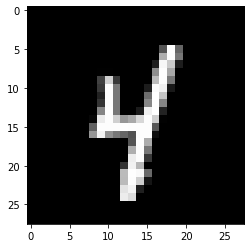

In [11]:
# let's visualize first training image
plt.imshow(mnist_training_images[0] ,cmap = 'gray')
print(mnist_training_labels[0])

tf.Tensor(2, shape=(), dtype=int64)


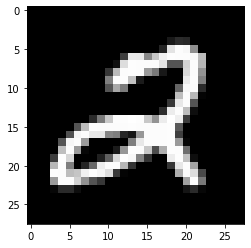

In [12]:
# also, let's visualize first test image
plt.imshow(mnist_test_images[0] ,cmap = 'gray')
print(mnist_test_labels[0])

In [13]:
# data preprocessing
# reshape into trainable vectors
num_training_images = mnist_training_images.shape[0]
num_test_images = mnist_test_images.shape[0]

img_width, img_height = mnist_training_images.shape[1], mnist_training_images.shape[2]

# since dense layer, we have to flatten 28x28 to 784x1.
mnist_training_images = tf.reshape(mnist_training_images, shape=(num_training_images, img_width * img_height))
mnist_test_images = tf.reshape(mnist_test_images, shape=(num_test_images, img_width * img_height))

# check the changes
print(mnist_training_images.shape)
print(mnist_test_images.shape)

# another preprocessing step is to normalize data
print(np.amax(mnist_training_images[0]),np.amin(mnist_training_images[0]))

print(np.amax(mnist_test_images[0]),np.amin(mnist_test_images[0]))

print(np.amax(mnist_training_labels),np.amin(mnist_training_labels))

print(np.amax(mnist_test_labels),np.amin(mnist_test_labels))

(60000, 784)
(10000, 784)
255 0
255 0
9 0
9 0


In [14]:
# conversion of data type and normalization of training data
# main idea of normalization/standardization -> variables that are at different scale contribute different.
# we want to reduce the "bias" as much as possible by these methods.
# min-max is highly influenced by outliers! min and max values affect a lot!
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

# one-hot labels and create dataloader with given batch size.
def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [15]:
train_dataset = create_dataset(mnist_training_images, mnist_training_labels)
test_dataset = create_dataset(mnist_test_images, mnist_test_labels)

In [16]:
print(train_dataset)
train_dataset.element_spec    

<BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.int64)>


(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.int64, name=None))

In [17]:
# check the dataloader
batch_images, batch_labels = next(iter(train_dataset))
print(batch_images.shape)
print(batch_labels.shape)
print(batch_images[0])
print(batch_labels[0])
print(np.amax(batch_images[0]),np.amin(batch_images[0]))

(128, 784)
(128, 10)
tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

In [ ]:
# visualize first batch training image to show it is corresponds to same class with printed label.
plt.imshow(batch_images[0] ,cmap = 'gray')

In [18]:
# Defining hyperparameters
input_shape = 784
label_shape = 10

lr = 0.003

layer_neurons = [
    [input_shape, 200],
    [200, 80],
    [80, label_shape],
]

bias_shapes = [200, 80, label_shape]
# xaiver uniform initializer
initializer = tf.initializers.glorot_uniform()

In [19]:
# define a dense layer, also, you can use TF2 API or Keras!
def dense_layer(inputs, weights, bias):
    return tf.nn.sigmoid(tf.matmul(inputs, weights) + bias)

In [20]:
# for initialization of weights and biases
def get_weight(shape, name):
    return tf.Variable(initializer(shape), name=name, trainable=True, dtype=tf.float32)

def get_bias(shape, name):
    return tf.Variable(initializer([shape]), name=name, trainable=True, dtype=tf.float32)

In [21]:
# define weights and bias lists to use in model
weights = []
bias = []
i = 0
for layer in layer_neurons:
    weights.append(get_weight(layer, 'weight{}'.format(i)))
    i+=1

i = 0
for layer in bias_shapes:
    bias.append(get_bias(layer, 'bias{}'.format(i)))
    i+=1


In [22]:
# define the model with initialized weights and biases
def model(input):
    l1 = dense_layer(input, weights[0], bias[0])
    l2 = dense_layer(l1, weights[1], bias[1])
    l3 = dense_layer(l2, weights[2], bias[2])
    #return tf.nn.softmax(l3)
    return l3

In [23]:
# define optimizer and loss function
optimizer = tf.optimizers.Adam(lr)

# it is with logits because we return the predictions without applying softmax!
# applied directly to prediction probabilities.
def loss(pred, target):
    return tf.nn.softmax_cross_entropy_with_logits(target, pred)

In [24]:
# we define our train_step here
# tf.GradientTape is used for recording operations for automatic differentiation. backward pass!
def train_step(model, inputs, outputs, epoch):
    epoch_loss_avg = None
    
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
        grads = tape.gradient(current_loss, weights)
        optimizer.apply_gradients(zip(grads, weights))
    
    epoch_loss_avg = tf.reduce_mean(current_loss)
    
    return epoch_loss_avg

In [25]:
num_epochs = 10
# batch by batch for each epoch -> traverse over all training dataset.
# total loss is divided by number of iterations to get average loss for each batch.
for epoch in range(num_epochs):
    epoch_loss = 0
    i = 0
    for train_data in train_dataset:
        batch_images, batch_labels = train_data
        iter_loss = train_step(model, batch_images, batch_labels, epoch)
        epoch_loss += iter_loss
        i+=1
    print("--- On epoch {} ---".format(epoch))
    tf.print("| Loss: ", epoch_loss/i)

--- On epoch 0 ---
| Loss:  1.63582146
--- On epoch 1 ---
| Loss:  1.51476598
--- On epoch 2 ---
| Loss:  1.49688733
--- On epoch 3 ---
| Loss:  1.4878068
--- On epoch 4 ---
| Loss:  1.4821254
--- On epoch 5 ---
| Loss:  1.47803211
--- On epoch 6 ---
| Loss:  1.47508657
--- On epoch 7 ---
| Loss:  1.47348416
--- On epoch 8 ---
| Loss:  1.47134519
--- On epoch 9 ---
| Loss:  1.46974969


In [26]:
acc = 0 
# use trained model over test dataset and normalize with number of test samples
# obtain accuracy!
for test_data in test_dataset:
    batch_images, batch_labels = test_data
    predictions = model(batch_images)
    predictions = tf.nn.softmax(predictions)
    equality = tf.math.equal(np.argmax(predictions, axis=1), np.argmax(batch_labels, axis=1))
    acc += np.sum(equality)
acc /= 10000
print(acc)

0.978
